# **A. Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# **B. Data Loading**

In [2]:
# Load data
df = pd.read_csv("car_insurance.csv")
df.head()

,Unnamed: 0,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack,0.0
1,1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat,1.0
2,2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken,1.0
4,4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0


In [3]:
# Re-encode
df = df.drop(columns=['Unnamed: 0'])
df["vehicle_ownership"] = df["vehicle_ownership"].map({0.: "no", 1.:"yes"})
df["married"] = df["married"].map({0.: "no", 1.:"yes"})
df["children"] = df["children"].map({0.: "no", 1.:"yes"})
df["outcome"] = df["outcome"].map({0.: "claim denied", 1.:"claim accepted"})
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,816393,40-64,female,20-29y,university,middle class,0.638050,no,after 2015,sports car,no,no,37379,11000.0,0,0,0,crack,claim denied
1,251762,26-39,male,20-29y,high school,middle class,0.475741,yes,before 2015,hatchback,yes,no,10238,9000.0,0,0,0,tire flat,claim accepted
2,481952,40-64,male,20-29y,none,middle class,0.839817,yes,before 2015,sedan,yes,yes,10238,12000.0,0,0,0,glass shatter,claim accepted
3,3506,40-64,male,20-29y,high school,upper class,0.682527,yes,before 2015,sedan,no,yes,92099,6000.0,1,0,0,lamp broken,claim accepted
4,498013,40-64,female,20-29y,none,working class,0.572184,yes,after 2015,sedan,yes,yes,32122,15000.0,0,0,1,glass shatter,claim denied


In [5]:
# drop duplicate
df.drop_duplicates(subset="id", inplace=True)

In [ ]:
# Save csv clean
df.to_csv('car_insurance_clean.csv', index=False)

# **C. Data Information**

| Kolom                | Deskripsi                                              |
|----------------------|--------------------------------------------------------|
| id                   | Identifikasi unik untuk setiap entri dalam dataset     |
| age                  | Usia individu dalam tahun                              |
| gender               | Jenis kelamin individu                                 |
| driving_experience   | Lamanya pengalaman mengemudi individu dalam tahun      |
| education            | Tingkat pendidikan individu                            |
| income               | Pendapatan tahunan individu dalam mata uang tertentu  |
| credit_score         | Skor kredit individu                                   |
| vehicle_ownership    | Menunjukkan kepemilikan kendaraan                      |
| vehicle_year         | Tahun pembuatan kendaraan                              |
| type_of_vehicle      | Jenis kendaraan yang dimiliki individu                 |
| married              | Status perkawinan individu                             |
| children             |  Sudah mempunayi anak atau belum                                   |
| postal_code          | Kode pos tempat tinggal individu                       |
| annual_mileage       | Jarak tempuh tahunan kendaraan individu                |
| speeding_violations  | Jumlah pelanggaran kecepatan                           |
| duis                 | Jumlah DUI (Driving Under Influence)                   |
| past_accidents       | Menunjukkan apakah individu pernah mengalami kecelakaan sebelumnya atau tidak |
| issue                | Masalah atau klaim yang diajukan terkait asuransi kendaraan |
| outcome              | Hasil akhir dari masalah atau klaim yang diajukan      |

In [6]:
df.shape

(98485, 19)

# **D. Exploratory Data Analysis (EDA)**

In [7]:
df_eda = df.copy()

## 1. Gender Distribution

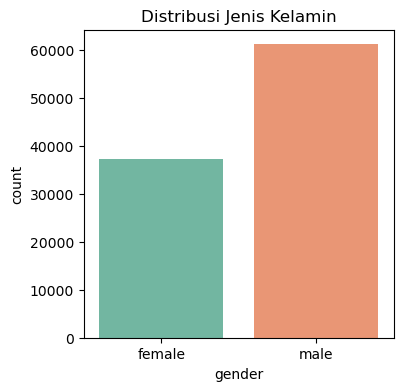

In [8]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data=df_eda, palette='Set2')
plt.title('Distribusi Jenis Kelamin')
plt.show()

Insight :  
Pengguna asuransi kendaraan terbanyak adalah pria, karena pria cenderung mengambil risiko lebih banyak saat mengemudi dibandingkan wanita, seperti mengemudi dengan kecepatan tinggi, manuver berbahaya, dan mengabaikan aturan lalu lintas.

Insight Bisnis :  
perusahaan asuransi dapat menawarkan produk asuransi yang disesuaikan berdasarkan jenis kelamin. Untuk pria, yang cenderung mengambil risiko lebih tinggi, asuransi bisa menawarkan paket dengan cakupan lebih luas yang mencakup aspek-aspek tertentu seperti kerusakan akibat kecelakaan berkecepatan tinggi atau manuver berbahaya.

## 2. Married Distribution

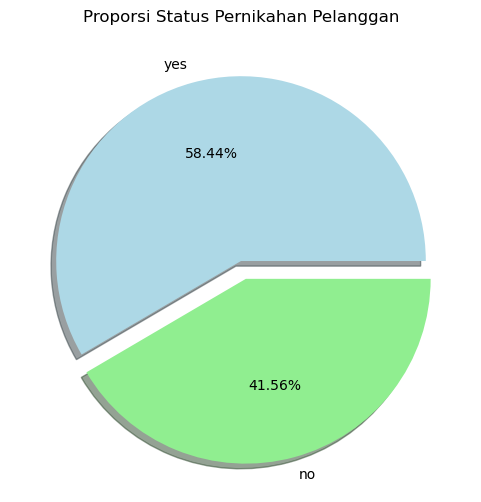

In [9]:
# Plot pie chart untuk kolom "married"
plt.figure(figsize=(6, 6))
df_eda['married'].value_counts().plot(kind='pie', shadow=True, explode=(0, 0.1), autopct='%.2f%%', colors=['lightblue', 'lightgreen'])
plt.title('Proporsi Status Pernikahan Pelanggan')
plt.ylabel('')
plt.show()

Insight :  

Orang yang sudah menikah lebih banyak menggunakan  asuransi kendaraan dibandingkan yang belum menikah.
Orang yang sudah menikah biasanya memiliki tanggung jawab yang lebih besar, mereka cenderung memikirkan keamanan dan perlindungan finansial bagi pasangan dan anak-anaknya, sehingga asuransi kendaraan menjadi salah satu cara untuk mengurangi risiko finansial yang mungkin timbul dari kecelakaan.

Insight Bisnis :  
Penawaran Produk yang Diferensiasi: Membuat paket asuransi kendaraan yang dirancang khusus untuk keluarga, yang mencakup perlindungan tambahan yang relevan dengan kebutuhan mereka. Contohnya adalah perlindungan terhadap kehilangan pendapatan akibat kecelakaan, atau asuransi kesehatan keluarga sebagai tambahan.

## 3. Education Distribution

Text(0.5, 1.0, 'Distribusi Tingkat Pendidikan')

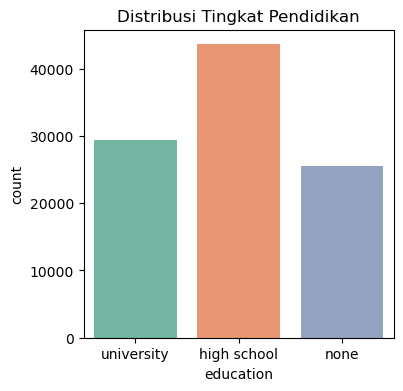

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(x='education', data=df_eda, palette='Set2')
plt.title('Distribusi Tingkat Pendidikan')

Insight :  
Pengguna asuransi dengan tingkat pendidikan high school menjadi pengguna terbanyak, dikuti pengguna asuransi dengan tingkat pendidikan university.

Pengguna asuransi dengan tingkat pendidikan high school mungkin memasuki angkatan kerja lebih awal daripada mereka yang mengejar pendidikan tinggi, sehingga memperoleh kemampuan finansial untuk memiliki kendaraan lebih cepat.

Insight Bisnis :  
Mengembangkan produk asuransi kendaraan yang lebih terjangkau, dengan premi rendah dan fleksibilitas dalam cakupan, dapat menarik segmen pasar ini. Produk tersebut bisa dirancang untuk memenuhi kebutuhan dasar pemilik kendaraan muda atau mereka yang baru pertama kali membeli asuransi, dengan opsi untuk menambah cakupan seiring bertambahnya kemampuan finansial dan kebutuhan mereka.

## 4. Type of Vehicle Distribution

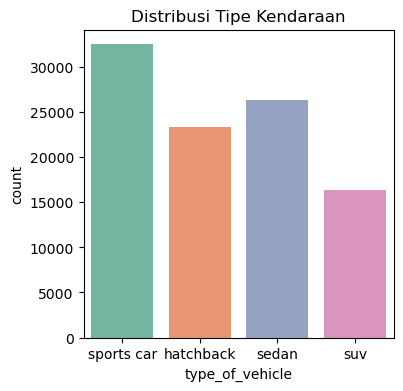

In [11]:
plt.figure(figsize=(4,4))
sns.countplot(x='type_of_vehicle', data=df_eda, palette='Set2')
plt.title('Distribusi Tipe Kendaraan')
plt.show()

Insight :  
Tren pengguna asuransi kendaraan yang lebih banyak memiliki mobil sport car, diikuti oleh sedan, hatchback, dan terakhir SUV.

1. Mobil sport sering dianggap memiliki risiko tinggi dan nilainya tinggi, sehingga pemiliknya lebih cenderung mengasuransikannya untuk melindungi investasi mereka.
2. Sedangkan sedan dan hatchback memiliki risiko dan nilai yang lebih moderat, sehingga jumlah pengguna asuransi kendaraan untuk tipe ini tidak sebanyak mobil sport. 
3. SUV, meskipun memiliki popularitas yang besar, cenderung memiliki premi asuransi yang lebih rendah karena dianggap lebih aman, namun biaya perbaikan yang tinggi dan popularitas di kalangan pencuri bisa mempengaruhi jumlah pengguna asuransi untuk tipe ini.

Insihgt Bisnis :  
Perusahaan asuransi dapat menawarkan produk khusus untuk mobil sport, termasuk fitur-fitur perlindungan yang lebih lengkap dan khusus, yang menarik bagi pemilik mobil sport.

## 5. Outcome Distribution

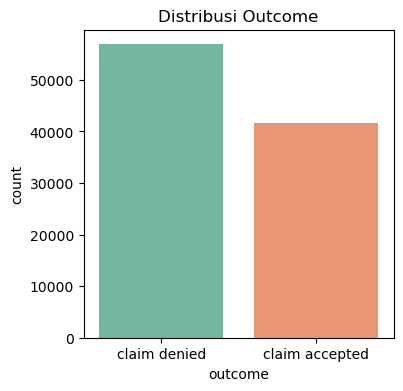

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x='outcome', data=df_eda, palette='Set2')
plt.title('Distribusi Outcome')
plt.show()

Insight:    
Pada data pengguna asuransi kendaraan, claim yang ditolak lebih besar daripada claim yang diterima, yang berarti:
1. Banyak klaim ditolak karena tidak memenuhi syarat-syarat yang tercantum dalam polis asuransi.
2. Beberapa klaim mungkin ditolak karena kerusakan kendaraan tergolong minor dan biaya perbaikannya di bawah batas klaim minimum yang ditetapkan oleh asuransi.
3.  Klaim mungkin juga ditolak jika terdapat indikasi penipuan atau pelanggaran atas kebijakan asuransi.

Insight Bisnis :  
1. Perusahaan asuransi dapat memperbaiki prosedur klaim mereka dengan memastikan bahwa syarat-syarat polis asuransi mudah dipahami oleh pelanggan dan dipatuhi dengan baik.
2. Perusahaan asuransi dapat melakukan segmentasi risiko yang lebih baik untuk mengidentifikasi dan menilai risiko-risiko potensial yang mungkin muncul dalam klaim. 
3. Dalam pencegahan penipuan perusahaan asuransi dapat melakukan analisis mendalam terhadap klaim-klaim yang dicurigai dapat membantu dalam mendeteksi indikasi penipuan atau pelanggaran kebijakan asuransi. 

## 6. Vehicle Year Distribution

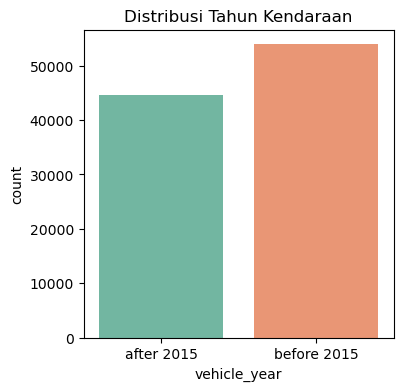

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x='vehicle_year', data=df_eda, palette='Set2')
plt.title('Distribusi Tahun Kendaraan')
plt.show()

Insight :   
Perbedaan jumlah kendaraan yang diasuransikan berdasarkan tahun pembuatan (sebelum vs. setelah 2015) bisa disebabkan oleh faktor biaya premi asuransi. Premi asuransi bisa lebih tinggi untuk kendaraan baru dibandingkan dengan kendaraan lama karena nilai penggantian yang lebih tinggi dan biaya perbaikan yang mungkin lebih mahal. Hal ini bisa membuat pemilik kendaraan baru lebih memilih untuk tidak mengasuransikan kendaraan mereka

Insight Bisnis :  
1. Paket Premi Fleksibel: Tawarkan paket premi yang dapat disesuaikan, mempertimbangkan fitur keselamatan dan teknologi kendaraan, untuk membuat premi lebih kompetitif bagi pemilik kendaraan baru.
2. Kemitraan Strategis: Bekerjasama dengan dealer dan produsen kendaraan untuk menawarkan asuransi sebagai bagian dari paket pembelian, dengan premi yang lebih terjangkau.

## 7. the relationship between gender and outcome

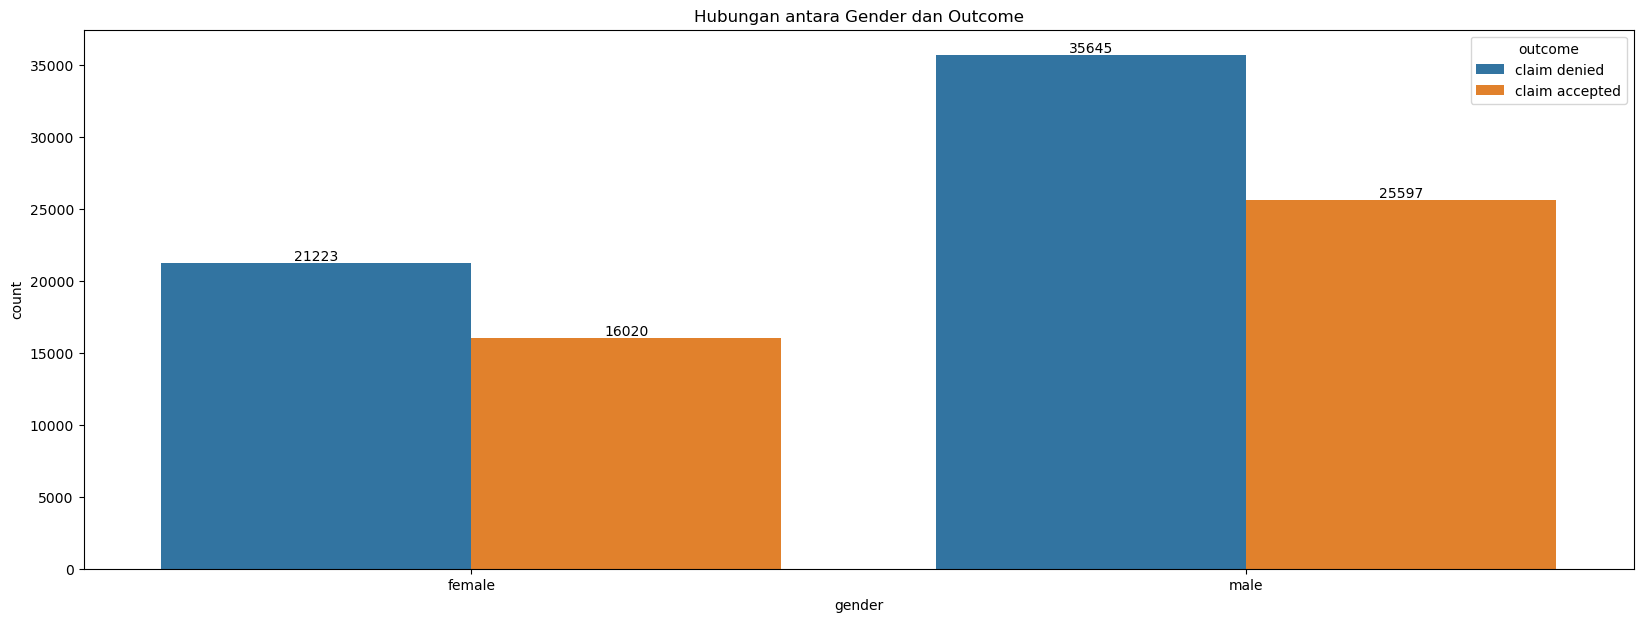

In [14]:
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='gender', hue='outcome', data=df_eda, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Hubungan antara Gender dan Outcome')
plt.show()

Insight :  
- Pengguna asuransi kendaraan terbanyak adalah pria, karena pria cenderung mengambil risiko lebih banyak saat mengemudi dibandingkan wanita, seperti mengemudi dengan kecepatan tinggi, manuver berbahaya, dan mengabaikan aturan lalu lintas.

- Dalam perbedaan rasio klaim yang ditolak (denied) dan diterima (accepted) antara pria dan wanita dalam asuransi kendaraan, mungkin wanita mengajukan klaim yang berbeda dari pria, baik dalam hal frekuensi maupun jenis. Misalnya, jika wanita cenderung mengajukan klaim untuk kerusakan yang lebih kecil atau insiden yang tidak melibatkan kecelakaan, klaim tersebut mungkin lebih mudah diproses dan diterima.

Insight Bisnis :  
Mengingat perbedaan dalam perilaku mengemudi dan jenis klaim antara pria dan wanita, perusahaan bisa mengembangkan produk asuransi yang lebih disesuaikan dengan kebutuhan spesifik masing-masing gender, atau bahkan mempertimbangkan produk yang menargetkan perilaku mengemudi yang lebih aman, tanpa diskriminasi gender

Contoh:  
Polis Asuransi dengan Poin Reward untuk Perilaku Mengemudi yang Aman
- Konsep: Pengemudi mendapatkan poin reward untuk setiap periode tanpa klaim atau pelanggaran lalu lintas, yang bisa ditukarkan untuk diskon premi atau manfaat lainnya.
- Manfaat: Mendorong pengemudi dari kedua gender untuk mengadopsi perilaku mengemudi yang lebih aman, dengan imbalan langsung yang bisa mengurangi biaya asuransi mereka.

## 8. the relationship between driving_experience and outcome

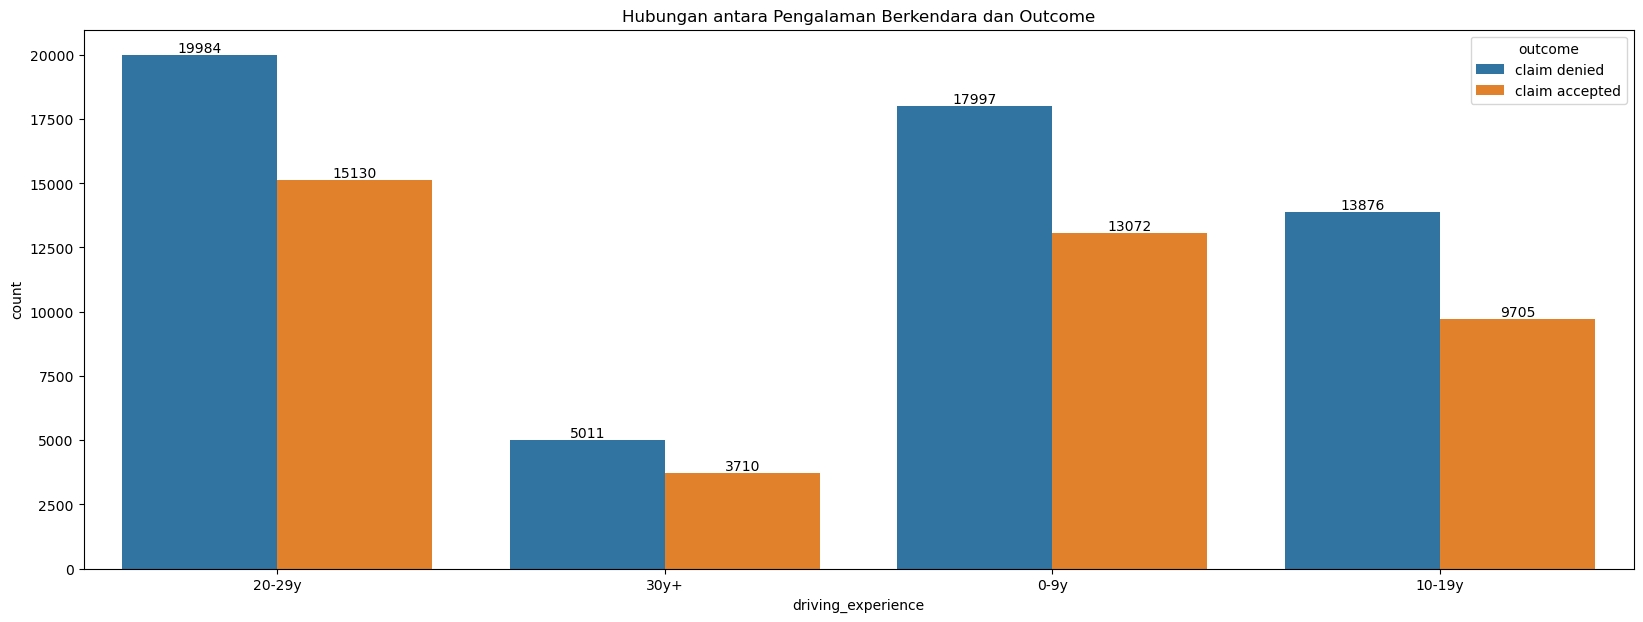

In [15]:
# Membuat countplot
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='driving_experience', hue='outcome', data=df_eda, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Hubungan antara Pengalaman Berkendara dan Outcome')
plt.show()

Insight :  
Perbedaan dalam selisih antara klaim yang ditolak (denied) dan diterima (accepted) antara pengemudi dengan berbagai tingkat pengalaman dapat dipengaruhi oleh beberapa faktor yang berkaitan dengan risiko dan kecenderungan klaim.
1. Pengalaman Mengemudi yang Lebih Baik, pengemudi dengan pengalaman lebih dari 30 tahun mungkin memiliki keterampilan mengemudi yang lebih baik dan telah mengembangkan kebiasaan yang lebih aman selama bertahun-tahun.
2. Perilaku Mengemudi yang Lebih Aman: Pengemudi dengan pengalaman lebih lama mungkin lebih sadar akan kepatuhan terhadap aturan lalu lintas dan prinsip keselamatan mengemudi.

Insight Bisnis : 
1. Perusahaan asuransi dapat mengembangkan program edukasi dan pelatihan untuk pengemudi dengan pengalaman yang lebih rendah, terutama mereka yang berada dalam rentang usia muda atau baru memiliki lisensi mengemudi. Program ini dapat memberikan informasi tentang praktik mengemudi yang aman, aturan lalu lintas, dan teknik berkendara yang efektif untuk membantu mengurangi risiko kecelakaan dan klaim.
2. Perusahaan asuransi dapat menggunakan teknologi canggih, seperti sensor kendaraan dan pemantauan telematika, untuk mengumpulkan data real-time tentang perilaku mengemudi pelanggan. Dengan memanfaatkan data ini, perusahaan dapat mengidentifikasi pola perilaku mengemudi yang berisiko tinggi dan memberikan umpan balik kepada pelanggan untuk membantu mereka meningkatkan kebiasaan mengemudi mereka.

## 9. the relationship between type_of_vehicle and outcome

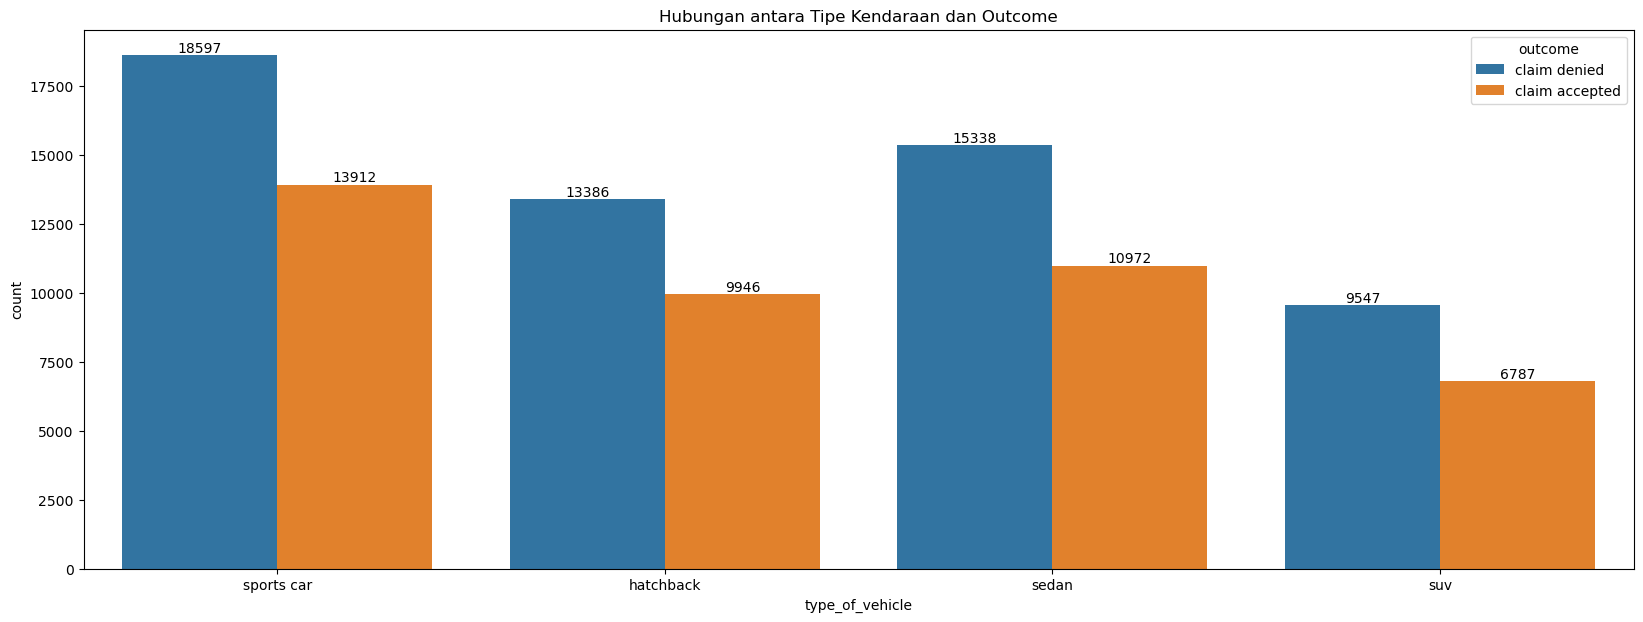

In [16]:
# Membuat countplot
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='type_of_vehicle', hue='outcome', data=df_eda, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Hubungan antara Tipe Kendaraan dan Outcome')

plt.show()

Insight :  
Sports car cenderung memiliki harga dan nilai yang lebih tinggi daripada hatchback, sedan, atau SUV. Hal ini dapat membuat perusahaan asuransi lebih berhati-hati dalam menangani klaim untuk sports car karena risiko keuangan yang lebih tinggi terkait dengan kendaraan tersebut.


Insight Bisnis :   
Berdasarkan risiko yang lebih tinggi yang terkait dengan sports car, perusahaan asuransi dapat mempertimbangkan untuk mengembangkan produk asuransi yang khusus untuk kendaraan ini. Produk ini dapat mencakup cakupan tambahan atau premi yang lebih tinggi untuk mengimbangi risiko yang lebih tinggi.


# **E. Conclusion**

**Insight :**

1. **Profil Pengguna Asuransi Kendaraan**:
   - Mayoritas pengguna asuransi kendaraan adalah pria, yang cenderung mengambil risiko lebih besar saat mengemudi.
   - Pengguna asuransi kendaraan yang sudah menikah lebih banyak, karena mereka cenderung lebih peduli terhadap keamanan dan perlindungan finansial bagi keluarga mereka.

2. **Tingkat Pendidikan dan Akses Kendaraan**:
   - Pengguna asuransi kendaraan terbanyak memiliki tingkat pendidikan high school, mungkin karena mereka lebih cepat memasuki angkatan kerja dan memperoleh kemampuan finansial untuk memiliki kendaraan.

3. **Tipe Kendaraan yang Paling Diasuransikan**:
   - Sports car adalah tipe kendaraan yang paling banyak diasuransikan, diikuti oleh sedan, hatchback, dan SUV.
   - Ini bisa disebabkan oleh risiko dan nilai yang tinggi dari sports car, sementara SUV dianggap lebih aman namun memiliki biaya perbaikan yang tinggi.

4. **Rasio Klaim Ditolak dan Diterima**:
   - Klaim yang ditolak lebih besar daripada yang diterima, menunjukkan adanya penolakan klaim yang signifikan karena berbagai alasan, termasuk ketidakpatuhan terhadap syarat-syarat polis asuransi dan klaim yang tidak mencapai batas klaim minimum.
   
5. **Pengaruh Tahun Pembuatan Kendaraan terhadap Asuransi**:
   - Ada perbedaan jumlah kendaraan yang diasuransikan berdasarkan tahun pembuatan, dengan kendaraan baru (setelah 2015) mungkin kurang diasuransikan karena biaya premi yang lebih tinggi.

6. **Perbedaan dalam Selisih Klaim Ditolak dan Diterima Berdasarkan Pengalaman Mengemudi**:
   - Pengalaman mengemudi yang lebih baik dan perilaku mengemudi yang lebih aman dapat mempengaruhi perbedaan dalam selisih klaim ditolak dan diterima antara pengemudi dengan berbagai tingkat pengalaman.

7. **Tingkat Risiko Sports Car dalam Klaim Asuransi**:
   - Sports car memiliki risiko keuangan yang lebih tinggi bagi perusahaan asuransi karena harga dan nilai yang tinggi, sehingga perusahaan asuransi lebih berhati-hati dalam menangani klaim untuk kendaraan tersebut.

**Berikut adalah beberapa insight bisnis untuk perusahaan asuransi kendaraan :**

1. **Segmentasi Pasar yang Lebih Baik**: Dengan mengetahui bahwa mayoritas pengguna asuransi kendaraan adalah pria, perusahaan dapat memperkuat segmentasi pasar mereka dan menyesuaikan strategi pemasaran untuk menargetkan lebih banyak pelanggan pria. Ini bisa meliputi kampanye iklan yang lebih terfokus dan penawaran produk yang lebih sesuai dengan preferensi dan kebutuhan pengemudi pria.

2. **Pengembangan Produk yang Lebih Relevan**: Data menunjukkan bahwa orang yang sudah menikah lebih banyak menggunakan asuransi kendaraan. Ini dapat menjadi peluang bagi perusahaan untuk mengembangkan produk asuransi kendaraan yang lebih disesuaikan dengan kebutuhan keluarga, seperti paket asuransi yang mencakup perlindungan bagi anggota keluarga yang berbeda.

3. **Pendidikan dan Akses Kendaraan**: Perusahaan dapat menggunakan informasi tentang tingkat pendidikan pelanggan untuk menyesuaikan strategi pemasaran dan pendekatan penjualan. Misalnya, mereka dapat menyediakan informasi tentang manfaat asuransi kendaraan kepada mereka yang memiliki tingkat pendidikan yang lebih rendah dan mungkin kurang terampil dalam memahami kompleksitas polis asuransi.

4. **Peningkatan Layanan untuk Pengguna Sports Car**: Dengan menyadari risiko keuangan yang lebih tinggi terkait dengan sports car, perusahaan dapat meningkatkan layanan mereka untuk pemilik sports car, termasuk penanganan klaim yang lebih cepat dan efisien serta penawaran premi yang lebih kompetitif.

5. **Peningkatan Pencegahan dan Pengawasan Klaim**: Dengan mengetahui bahwa klaim yang ditolak lebih besar daripada yang diterima, perusahaan dapat meningkatkan proses pengawasan dan penilaian klaim untuk memastikan bahwa klaim yang diajukan memenuhi syarat dan terkait dengan kerugian yang sah.

6. **Analisis Lebih Lanjut tentang Tren Pembelian**: Data tentang perbedaan jumlah kendaraan yang diasuransikan berdasarkan tahun pembuatan dapat memberikan wawasan tentang preferensi dan kebiasaan pembelian pelanggan. Perusahaan dapat menggunakan informasi ini untuk mengembangkan strategi produk dan penawaran promosi yang lebih sesuai dengan tren pasar.

Dengan memanfaatkan insight-insight ini, perusahaan asuransi kendaraan dapat meningkatkan efektivitas operasional mereka, memperluas pangsa pasar, meningkatkan kepuasan pelanggan, dan mengurangi risiko keuangan yang terkait dengan klaim asuransi.